## MODEL class

1. It is high-level Interface in ansys-dpf-core for loading simulation data, acceesing results and managing metadata.
2. Serves as PRIMARY entry point for working with simulation files, provides access to mesh, results data and analysis metadata.

## Loading Simulation Data

1. > You can load data via <b>files path</b> or <b>DataSources</b>

In [1]:
from ansys.dpf import core as dpf

In [2]:
help(dpf.Model)


# data_sources: dpf.DataSource or a file path
# server : in case you can use existing local dpf server, else it will start its own or use global existing server.

Help on class Model in module ansys.dpf.core.model:

class Model(builtins.object)
 |  Model(data_sources=None, server=None)
 |  
 |  Connects to a gRPC DPF server and allows access to a result using the DPF framework.
 |  
 |  Parameters
 |  ----------
 |  data_sources : str, dpf.core.DataSources, os.PathLike
 |      Accepts either a :class:`dpf.core.DataSources` instance or the path of the
 |      result file to open as an os.PathLike object or a str. The default is ``None``.
 |  server : server.DPFServer, optional
 |      Server with the channel connected to the remote or local instance. The
 |      default is ``None``, in which case an attempt is made to use the global
 |      server.
 |  
 |  Examples
 |  --------
 |  >>> from ansys.dpf import core as dpf
 |  >>> from ansys.dpf.core import examples
 |  >>> transient = examples.download_transient_result()
 |  >>> model = dpf.Model(transient)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data_sources=None, server=None)
 |   

### Results Interface

The `model.results` interface provides dynamic access to simulation results based on the content of the loaded files. This system automatically detects available results and creates corresponding result operators.

In [3]:
from ansys.dpf.core import examples

rst_path = examples.static_rst

In [4]:
model = dpf.Model(data_sources=rst_path)

In [5]:
print(model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  elastic_strain: ElementalNodal Strain
     -  elastic_strain_eqv: ElementalNodal Strain eqv
     -  element_orientations: ElementalNodal Element Euler Angles
     -  structural_temperature: ElementalNodal Structural temperature
------------------------------
DPF  Meshed Region: 
  81 nodes 
  8 elements 
  Unit: m 
  With solid (3D) ele

In [6]:
field_container = model.results.displacement.on_all_time_freqs.eval()

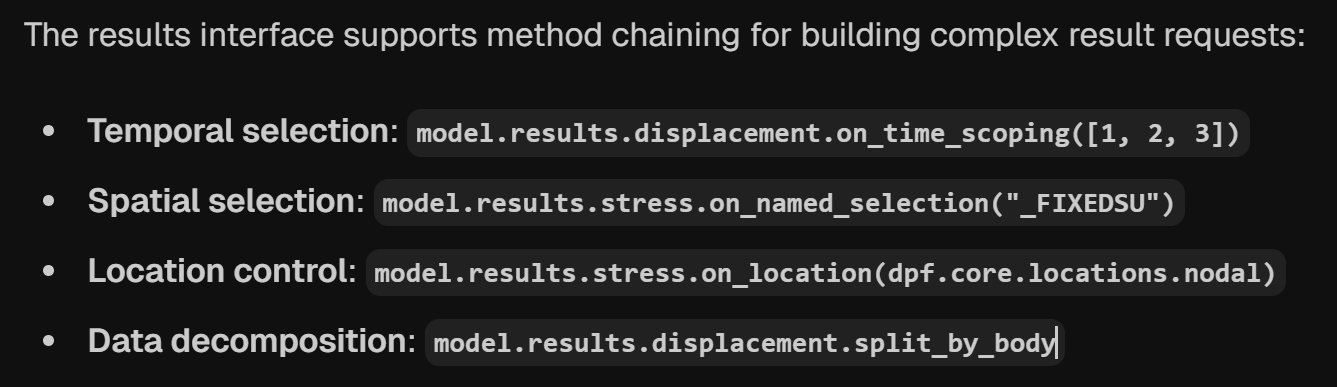

In [7]:
print(field_container)

DPF displacement(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 3 components and 81 entities.



## Access to Result MetaData

In [8]:
print(model.metadata.result_info)

Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  elastic_strain: ElementalNodal Strain
     -  elastic_strain_eqv: ElementalNodal Strain eqv
     -  element_orientations: ElementalNodal Element Euler Angles
     -  structural_temperature: ElementalNodal Structural temperature



#### Basic Result Extraction

In [9]:
model = dpf.Model(examples.transient_therm)

In [10]:
model.metadata.result_info.available_results

[AvailableResult<name=temperature>,
 AvailableResult<name=smisc>,
 AvailableResult<name=elemental_volume>,
 AvailableResult<name=stiffness_matrix_energy>,
 AvailableResult<name=artificial_hourglass_energy>,
 AvailableResult<name=kinetic_energy>,
 AvailableResult<name=co_energy>,
 AvailableResult<name=incremental_energy>,
 AvailableResult<name=thermal_dissipation_energy>,
 AvailableResult<name=element_orientations>,
 AvailableResult<name=heat_flux>,
 AvailableResult<name=nmisc>]

In [11]:
temp_results  = model.results.temperature.on_all_time_freqs.eval()
print(temp_results)

DPF temperature(s)Fields Container
  with 15 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 1 components and 4125 entities.
  - field 1 {time:  2} with Nodal location, 1 components and 4125 entities.
  - field 2 {time:  3} with Nodal location, 1 components and 4125 entities.
  - field 3 {time:  4} with Nodal location, 1 components and 4125 entities.
  - field 4 {time:  5} with Nodal location, 1 components and 4125 entities.
  - field 5 {time:  6} with Nodal location, 1 components and 4125 entities.
  - field 6 {time:  7} with Nodal location, 1 components and 4125 entities.
  - field 7 {time:  8} with Nodal location, 1 components and 4125 entities.
  - field 8 {time:  9} with Nodal location, 1 components and 4125 entities.
  - field 9 {time:  10} with Nodal location, 1 components and 4125 entities.
  - field 10 {time:  11} with Nodal location, 1 components and 4125 entities.
  - field 11 {time:  12} with Nodal location, 1 components and 4125 ent

### Time-based analysis

In [12]:
time_scoping = [1, 5, 10, 15]
temp_fc = model.results.temperature.on_time_scoping(time_scoping=time_scoping).eval()

In [13]:
print(temp_fc)

DPF temperature(s)Fields Container
  with 4 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 1 components and 4125 entities.
  - field 1 {time:  5} with Nodal location, 1 components and 4125 entities.
  - field 2 {time:  10} with Nodal location, 1 components and 4125 entities.
  - field 3 {time:  15} with Nodal location, 1 components and 4125 entities.



### Subset Analysis

In [14]:
model.metadata.available_named_selections

['_CM54', '_ELMISC']

In [15]:
named_selection_temp = model.results.temperature.on_named_selection("_CM54").eval()

In [16]:
print(named_selection_temp)

DPF temperature(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  15} with Nodal location, 1 components and 205 entities.



## Practice Exercises

### Exercise 1: Model Metadata Exploration
Using the loaded model:
1. Print the number of nodes in the mesh
2. Print the number of elements in the mesh
3. Find and print the analysis type
4. Get and print all available result types

In [17]:
# Your code for Exercise 1 here

### Exercise 2: Working with Time Steps
1. Get all available time frequencies from the model
2. Print how many time steps are available
3. Extract displacement results for time steps 1, 3, and 5
4. For each of these time steps, print the maximum displacement magnitude

In [18]:
# Your code for Exercise 2 here

### Exercise 3: Named Selections
1. Print all available named selections
2. Get stress results on the first named selection
3. Print the number of entities (nodes/elements) in that named selection

In [19]:
# Your code for Exercise 3 here

---

## Solutions (Try the exercises first!)

### Solution 1: Model Metadata Exploration

In [20]:
# Solution 1: Model Metadata Exploration

# Get mesh information
mesh = model.metadata.meshed_region

print("Model Metadata:")
print(f"  Number of nodes: {mesh.nodes.n_nodes}")
print(f"  Number of elements: {mesh.elements.n_elements}")
print()

# Get analysis type
print(f"  Analysis type: {model.metadata.result_info.analysis_type}")
print()

# Get available result types
print("  Available result types:")
for result in model.metadata.result_info.available_results:
    print(f"    - {result}")

Model Metadata:
  Number of nodes: 4125
  Number of elements: 784

  Analysis type: static

  Available result types:
    - DPF Result
----------
temperature
Operator name: "TEMP"
Number of components: 1
Dimensionality: scalar
Homogeneity: temperature
Units: degC
Location: Nodal

    - DPF Result
----------
smisc
Operator name: "SMISC"
Number of components: 1
Dimensionality: scalar
Homogeneity: 
Location: Elemental

    - DPF Result
----------
elemental_volume
Operator name: "ENG_VOL"
Number of components: 1
Dimensionality: scalar
Homogeneity: volume
Units: m^3
Location: Elemental

    - DPF Result
----------
stiffness_matrix_energy
Operator name: "ENG_SE"
Number of components: 1
Dimensionality: scalar
Homogeneity: energy
Units: J
Location: Elemental

    - DPF Result
----------
artificial_hourglass_energy
Operator name: "ENG_AHO"
Number of components: 1
Dimensionality: scalar
Homogeneity: energy
Units: J
Location: Elemental

    - DPF Result
----------
kinetic_energy
Operator name: "E

d:\Work\Accounts\PYAnsys\Workshop\PyDPF\.venv\lib\site-packages\ansys\dpf\core\available_result.py:228: UserWarning: 10000 is not a valid Homogeneity
  warn(str(exception))


### Solution 2: Working with Time Steps

In [22]:
# Solution 2: Working with Time Steps
import numpy as np
from ansys.dpf.core import examples
model = dpf.Model(examples.download_transient_result())
# Get time frequencies
time_freq = model.metadata.time_freq_support.time_frequencies

print("Time Information:")
print(f"  Number of time steps: {len(time_freq)}")
print(f"  Time values: {time_freq.data[:5]}... (showing first 5)")
print()

# Extract displacement for specific time steps
disp_results = model.results.displacement.on_time_scoping([1, 3, 5]).eval()

print("Displacement Results for Time Steps 1, 3, 5:")
for i, time_step in enumerate([1, 3, 5]):
    field = disp_results[i]
    # Calculate displacement magnitudes
    magnitudes = np.linalg.norm(field.data, axis=1)
    max_disp = np.max(magnitudes)
    print(f"  Time step {time_step}: Max displacement = {max_disp:.6f} {field.unit}")

Time Information:
  Number of time steps: 35
  Time values: [0.       0.019975 0.039975 0.059975 0.079975]... (showing first 5)

Displacement Results for Time Steps 1, 3, 5:
  Time step 1: Max displacement = 0.000000 m
  Time step 3: Max displacement = 0.002509 m
  Time step 5: Max displacement = 0.010000 m


### Solution 3: Named Selections

In [23]:
# Solution 3: Named Selections

# Get all available named selections
named_sels = model.metadata.available_named_selections

print("Named Selections:")
print(f"  Available named selections: {named_sels}")
print()

if len(named_sels) > 0:
    # Get stress on first named selection
    first_ns = named_sels[0]
    stress_ns = model.results.stress.on_named_selection(first_ns).eval()
    
    print(f"Stress on named selection '{first_ns}':")
    print(f"  Number of fields: {len(stress_ns)}")
    
    if len(stress_ns) > 0:
        first_field = stress_ns[0]
        print(f"  Number of entities: {len(first_field.scoping)}")
        print(f"  Entity IDs (first 10): {first_field.scoping.ids[:10]}")
else:
    print("  No named selections available in this model")

Named Selections:
  Available named selections: []

  No named selections available in this model
